# Data Analysis with Python II
### EPIC 1 - 10.25.21
#### EXERCISES
- Daniel Villarruel *(Team Astro)*


In [46]:
import matplotlib as mt
import matplotlib.pyplot as plt
from astropy import ascii
import numpy as np
import pandas as pd
import vtk
import math
from IPython.display import Image

ImportError: cannot import name 'ascii' from 'astropy' (/home/daniel/anaconda3/lib/python3.8/site-packages/astropy/__init__.py)

### Problem 1.
Calculate:


**1. The pressure of the plasma permeating the Solar corona. How does it compare to Earth's atmospheric pressure at the sea level? The number density of the Solar corona is $n=10^9\,\rm cm^{-3}$ and its temperature is $T=2\times 10^6\,\rm K$.**

In [10]:
# Solar corona variables
n_s = 1e9
T_s = 2e6

# Earth variables
n_e = 2.504e19
T_e = 298.15

# Define pressure function
def pressure(x, y):
    return(x*1.38e-16*y)

print()
print('(P_s) Pressure of the plasma permeating solar corona [dyne/cm²]: ', '{:0.5e}'.format(pressure(n_s, T_s)))
print()
print('(P_e) Earths atmospheric pressure at sea level [dyne/cm²]: ', '{:0.5e}'.format(pressure(n_e, T_e)))
print()
print('P_s = ', '{:0.5e}'.format(pressure(n_s, T_s)/pressure(n_e, T_e)), 'P_e')



(P_s) Pressure of the plasma permeating solar corona [dyne/cm²]:  2.76000e-01

(P_e) Earths atmospheric pressure at sea level [dyne/cm²]:  1.03026e+06

P_s =  2.67893e-07 P_e


In [11]:
n = n_s/n_e
T = T_s/T_e

print('n_s = ', '{:0.5e}'.format(n), ' n_e')
print()
print('T_s = ', '{:0.5e}'.format(T), ' T_e')
print()

n_s =  3.99361e-11  n_e

T_s =  6.70803e+03  T_e



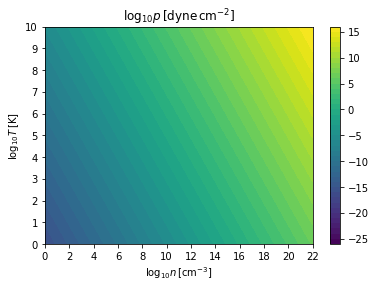

In [12]:
n_density = np.arange(0, 22, 0.01)
temperature = np.arange(0, 10, 0.01)

number_density = np.arange(0,22,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(number_density, temperature)

pressure_2D = np.array(pressure(np.ravel(10**X), np.ravel(10**Y)))
Z = pressure_2D.reshape(X.shape)

fig,ax=plt.subplots(1, 1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(-26, 16, 43), cmap='viridis')

fig.colorbar(cp) 
ax.set_title(r'$\log_{10} p\,\rm [dyne\,cm^{-2}$]')
ax.set_xticks(np.arange(0,23,2))
ax.set_xlabel(r'$\log_{10} n\,\rm [cm^{-3}]$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$\log_{10} T\,\rm [K]$')
plt.show()

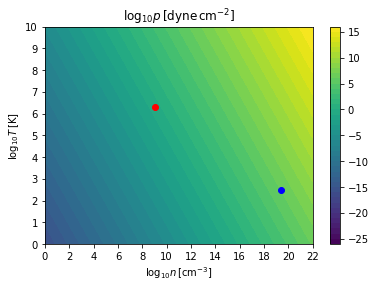

In [13]:
n1 = np.log10(n_s)
T1 = np.log10(T_s)
n2 = np.log10(n_e)
T2 = np.log10(T_e)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(-26, 16, 43), cmap='viridis')
ax.scatter(n1, T1, c='red')
ax.scatter(n2, T2, c='blue')

fig.colorbar(cp) 
ax.set_title(r'$\log_{10} p\,\rm [dyne\,cm^{-2}$]')
ax.set_xticks(np.arange(0,23,2))
ax.set_xlabel(r'$\log_{10} n\,\rm [cm^{-3}]$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$\log_{10} T\,\rm [K]$')
plt.show()

The value of the pressure in the solar corona is in the order of $10^{-7}$ lower than Earth's atmospheric pressure at sea level. Though Earth's mean temperature is way lower than the solar corona, the number of particles is greater in the order of $10^{10}$.

$\phantom{}$

**2. The polytropic index of carbon-monoxide (CO) gas.**

Carbon-monoxide is a diatomic compound - so according to the information given in the lecture, **it has 7 degrees of freedom** (including vibrational)

$$\gamma = 1+\dfrac{2}{f}$$

$$\gamma = \dfrac{9}{7}$$

**3. The mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram $T$ vs. $\mu$ shown in class. How does the value compare to that of atomic hydrogen?**

Earth's atmosphere composition (by percentage):
- Nitrogen ($N_{2}$) -> $78.08\% $
- Oxygen ($O_{2}$) -> $20.95\% $
- Argon ($Ar$) -> $0.93\%$
- Other elements (less than 1% and not representative for this exercise)

$$\dfrac{1}{\mu}=\sum_{i} \dfrac{x_{i}}{A_{i}}(1+Z_{i})$$

where $\mu$ is the mean particle mass, $x_{i}$ is the percentual weigth of the $\mathcal{i}th$ element, $A_{i}$ is the mass number, and $Z_{i}$ is the charge of the nucleus

$$\dfrac{1}{\mu}=\dfrac{x_{N}}{A_{N}}(1+Z_{N})+\dfrac{x_{O}}{A_{O}}(1+Z_{O})+\dfrac{x_{Ar}}{A_{Ar}}(1+Z_{Ar})$$

$$\mu = 1.644$$

$\phantom{}$

In [7]:
# Define a function to get the calculation for the ith element, given x, A and Z
def mpm_i(x, a, z):
    mu_i = (x / a)*(1 + z)
    return mu_i

# Calculation of the MPM
mu_1 = mpm_i(0.7808, 14, 7) + mpm_i(0.2095, 16, 8) + mpm_i(0.093, 40, 18)
mu_c = 1/mu_1

print('Mean Particle Mass (Air)= ', '{:0.5}'.format(mu_c))
print()


Mean Particle Mass (Air)=  1.6442



/tmp/ipykernel_2360/2634222591.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt((gamma*k_B*temp)/(mu*amu))


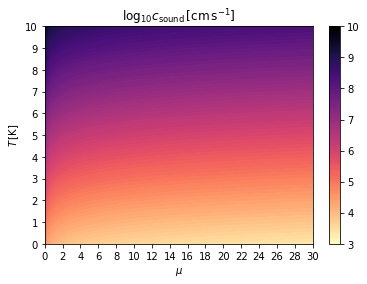

In [19]:
# Define the EOS equation
def sound_speed(mu, temp):
    gamma = 5./3.
    k_B = 1.38e-16
    amu = 1.660e-24 
    return np.sqrt((gamma*k_B*temp)/(mu*amu))

# Create a 2D grid with n and T as X and Y.
mu = np.arange(0,30,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(mu, temperature)

# Compute pressure on the grid
pressure_2D = np.array(sound_speed(np.ravel(X), np.ravel(10**Y)))
Z = pressure_2D.reshape(X.shape)

# Plot pressure
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')

# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()


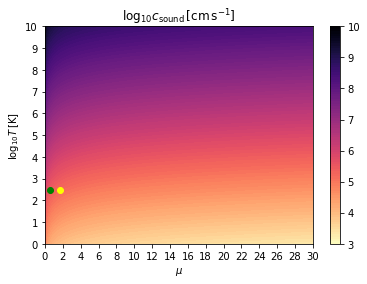

In [20]:
# Plot phase plot, including the two points above.
mu1 = 1.6442
T1 = np.log10(T_e)

mu2 = 0.61
T2 = np.log10(T_e)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')
ax.scatter(mu1, T1, c='yellow')
ax.scatter(mu2, T2, c='green')
    
# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$\log_{10}T\,\rm [K]$')
plt.show()

The plot shows the comparison of air in Earth's atmosphere and atomic hydrogen, when evaluated at the same temperature. It points to greater velocity in the case of the last one. A gas composed of a single, light element transports mechanical waves easier.

$\phantom{}$

**4. The Reynolds number of the blood flow in the aorta. Hint: Use the Internet to get the parameters you need.**

Blood flow in the aorta:
- Blood dynamic viscosity -> $\;$ $3\cdot 10^{-3}\; Pa\cdot s$
- Blood velocity -> $\;$ $1.28 \; m/s$
- Blood density -> $\;$ $1060 \; kg/m^{3}$
- Aorta length -> $\;$ $0.332 \; m$

In [22]:
# Define Re function

def Re_number(rho, vel, length, mu):
    return (rho*vel*length)/(mu)

# All quantities in SI units.

mu = 0.003
le = 0.332
rho = 1060
vel = 1.28


print('The Reynolds number is', "{:0.5e}".format(Re_number(rho,vel,le,mu)))
print()


The Reynolds number is 1.50153e+05



$\phantom{}$

### Problem 2.
Considering the example of the swimming fish we saw in class, calculate the Reynolds numbers for different swimming speeds and make a plot of $R_{\rm e}$ vs. speed. Indicate the laminar and turbulent regimes on the plot. At which speed does the fish start generating a turbulent flow in sea water?

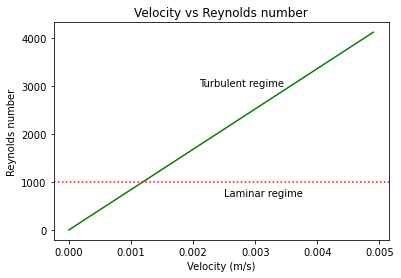

In [44]:
def Re_number(vel):
    mu = 0.00122
    length = 1
    rho = 1026
    return (rho*vel*length)/(mu)

vel = np.arange(0, 0.005, 1e-4)
R_n = Re_number(vel)

fig,ax=plt.subplots(1,1)
ax.plot(vel, R_n, c = 'green')

ax.set_ylabel(r'Reynolds number')
ax.set_xlabel(r'Velocity (m/s)')
ax.set_title('Velocity vs Reynolds number')
plt.axhline(y=1000,ls=':',c='red')
plt.text(0.0025, 700, 'Laminar regime')
plt.text(0.0021, 3000, 'Turbulent regime')
plt.show()

The fish starts generating a turbulent flow at (approx.) > 0.001 m/s

$\phantom{}$

### Problem 3.
Download the full dataset from the 2D turbulence simulation that we analysed in class (TURB_DRIVE) and:

 - Calculate the rms flow velocity and the corresponding rms Mach number as a function of time (see equations in the lecture notebook).
 
 
 - Save the data into a text file as shown in the example in class, and then make a plot of rms Mach number versus time. Remember that the sound speed of the simulation is $c_{\rm iso}=10\,\rm km\,s^{-1}$.
 
 
 - Based on the result above, is the gas subsonic or supersonic in this simulation?
 
 
 - Calculate the gas pressure using the isothermal equation of state ($p=\rho\,c_{\rm iso}^2$), and make and print a 2D map of the pressure for file #70.
 
 
 - Now that you have the pressure, you can calculate the so-called plasma beta of the gas, which is a dimensionless parameter that relates thermal, $p$, and magnetic pressure $\left(\frac{B^2}{8\,\pi}\right)$. Compute the plasma beta and make and print a 2D map for file #70.
 
 $$\beta = \frac{8\,\pi\,p}{B^2}$$

In [45]:
def read_my_vtk(file_name):
    """Read Pluto's VTK simulation files and returns the variables in CGS units"""
    
    # Path to files
    input_directory= "./TURB_DRIVE/" #"../../TURB_DRIVE/"
    file_name = file_name
    times_file = "vtk.out" # para los tiempos
    
    # Normalisation values
    l0 = 3.086e+18                    # Length is 1pc
    v0 = 1.e+6                        # Velocity is 10km/s
    rho0 = 1.66e-24                   # In g/cm^3
    mu = 6.72E-01                     # Mean particle mass
    mm = 1.660E-24                    # 1 Atomic mass unit
    kb = 1.380E-16                    # in CGS units
    tem0 = (mu*(mm*(v0**2))/kb)       # in K
    bfi0 = 4*math.pi*(rho0*(v0**2))   # in Gauss

    # Standard VTK loading routines
    reader= vtk.vtkDataSetReader()
    reader.SetFileName(input_directory+file_name)
    reader.ReadAllVectorsOn()
    reader.ReadAllScalarsOn()
    reader.Update()

    # Get data using hearder information
    data = reader.GetOutput() 
    dens = data.GetCellData().GetArray("rho")
    vel1 = data.GetCellData().GetArray("vx1")
    vel2 = data.GetCellData().GetArray("vx2")
    bfi1 = data.GetCellData().GetArray("vx1")
    bfi2 = data.GetCellData().GetArray("vx2")
    
    # Get dimensions, needed to get 3D arrays, instead of 1D vectors
    dim = data.GetDimensions()
    vec = list(dim)
    vec = [i-1 for i in dim]
    
    # Copy data into numpy arrays
    rho = np.array(dens)
    vx1 = np.array(vel1)
    vx2 = np.array(vel2)
    Bx1 = np.array(bfi1)
    Bx2 = np.array(bfi2)
    
    # Reshape them into 3D arrays
    rho = rho.reshape(vec[0],vec[1],order='F')
    vx1 = vx1.reshape(vec[0],vec[1],order='F')
    vx2 = vx2.reshape(vec[0],vec[1],order='F')
    Bx1 = Bx1.reshape(vec[0],vec[1],order='F')
    Bx2 = Bx2.reshape(vec[0],vec[1],order='F')
    
    # In astrophysical units
    rho = rho*rho0       # Gas density in g/cm^3
    nrh = rho/(mu*mm)    # Gas number density in cm^-3
    vx1 = vx1*v0/1.e5    # X-velocity component in km/s
    vx2 = vx2*v0/1.e5    # Y-velocity component in km/s
    Bx1 = Bx1*bfi0       # X-Bfield component in G
    Bx2 = Bx2*bfi0       # Y-Bfield component in G
    
    # Times
    times = ascii.read(input_directory+times_file)
    times = np.array(times['col2'])*l0/v0 # 1D array containing the simulation time in seconds
    
    return times, rho, nrh, vx1, vx2, Bx1, Bx2
    # tr1 is a cloud material tracer